In [1]:
from torchvision import transforms, datasets

from styleclr.utils import move_to_top_directory
from styleclr.dataset import StylizedDataset, PainterDataset


In [2]:
move_to_top_directory()
%pwd

'/home/felix/styleclr'

In [3]:
content_transform = transforms.Compose([
    transforms.ToTensor()
])
content_dataset = datasets.STL10(root='datasets/stl10', split='unlabeled',
                transform=content_transform, download=True)

Files already downloaded and verified


In [4]:
content_dataset[2][0].shape

torch.Size([3, 96, 96])

In [5]:
style_transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor()
])
style_dataset = PainterDataset(root='datasets/painter', transform=style_transform)


In [7]:
toPIL = transforms.ToPILImage()

In [18]:
decoder_path = 'adain/models/decoder.pth'
vgg_path = 'adain/models/vgg_normalised.pth'

stylized_dataset = StylizedDataset(content_dataset, style_dataset, vgg_path, decoder_path, alpha=1)

In [19]:
(stylized_image1, stylized_image2) = stylized_dataset[100]

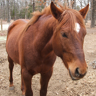

In [20]:
toPIL(content_dataset[100][0])

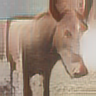

In [21]:
toPIL(stylized_image1[0].cpu())

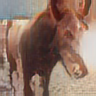

In [22]:
toPIL(stylized_image2[0].cpu())